## Importar Librerías Necesarias

```markdown
Se importan las librerías y funciones necesarias para la implementación de las distintas tareas a realizar durante el proyecto de análisis
```

In [236]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import *
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.feature_selection import *
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [237]:
project_dataframe = pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")

print(project_dataframe.head())
print(project_dataframe.info())
print(project_dataframe.describe())

   Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  Public_Transportation        

In [238]:
numeric_variables = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

project_dataframe[numeric_variables] = project_dataframe[numeric_variables].fillna(project_dataframe[numeric_variables].median())

nominal_variables = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']

project_dataframe[nominal_variables] = project_dataframe[nominal_variables].fillna(project_dataframe[nominal_variables].mode().iloc[0])

In [239]:
label_encoders = {}

# nominal_variables.append('NObeyesdad')

for columns in nominal_variables:
   label_encoder = LabelEncoder()
   project_dataframe[columns] = label_encoder.fit_transform(project_dataframe[columns])  # Transformar la columna en numérica
   label_encoders[columns] = label_encoder

print(project_dataframe.head())

   Gender   Age  Height  Weight  family_history_with_overweight  FAVC  FCVC  \
0       0  21.0    1.62    64.0                               1     0   2.0   
1       0  21.0    1.52    56.0                               1     0   3.0   
2       1  23.0    1.80    77.0                               1     0   2.0   
3       1  27.0    1.80    87.0                               0     0   3.0   
4       1  22.0    1.78    89.8                               0     0   2.0   

   NCP  CAEC  SMOKE  CH2O  SCC  FAF  TUE  CALC  MTRANS           NObeyesdad  
0  3.0     2      0   2.0    0  0.0  1.0     3       3        Normal_Weight  
1  3.0     2      1   3.0    1  3.0  0.0     2       3        Normal_Weight  
2  3.0     2      0   2.0    0  2.0  1.0     1       3        Normal_Weight  
3  3.0     2      0   2.0    0  2.0  0.0     1       4   Overweight_Level_I  
4  1.0     2      0   2.0    0  0.0  0.0     2       3  Overweight_Level_II  


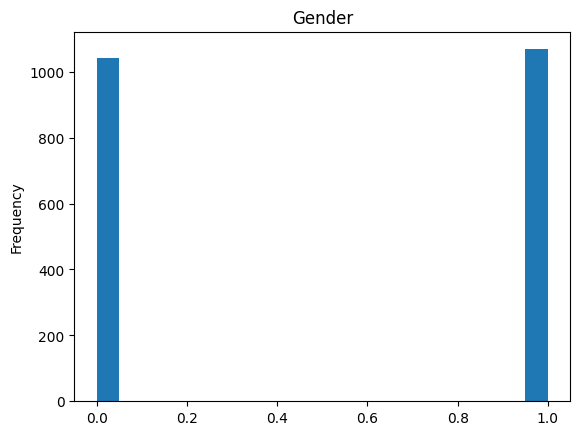

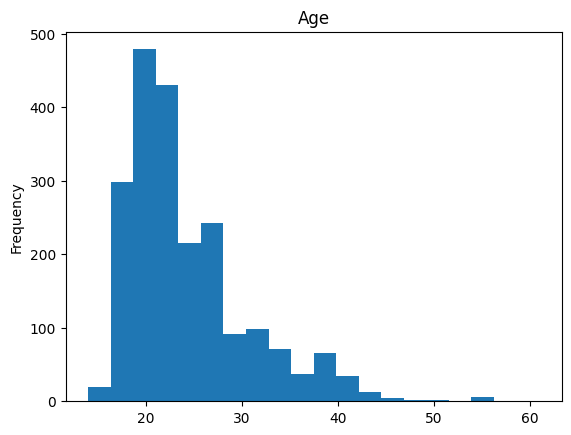

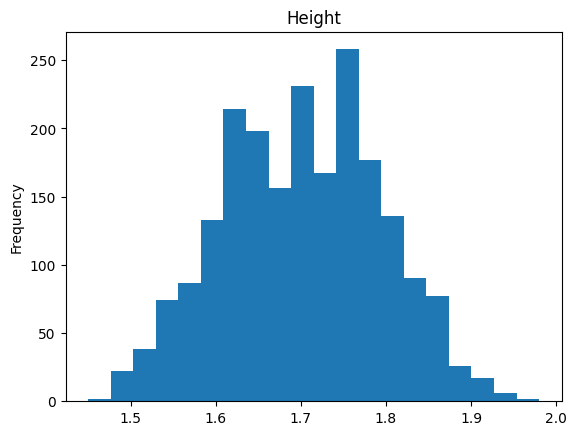

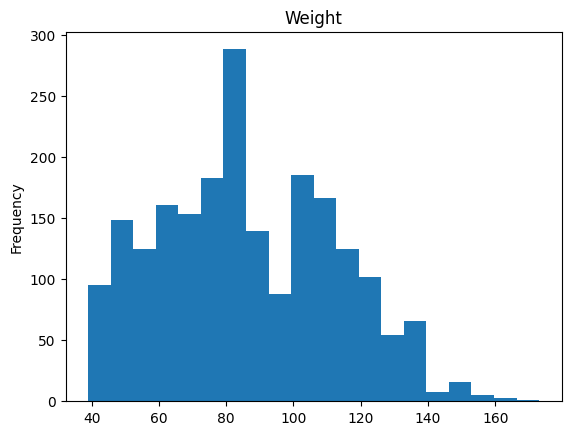

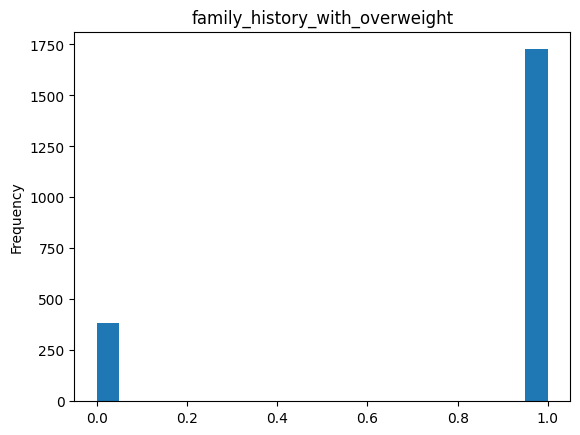

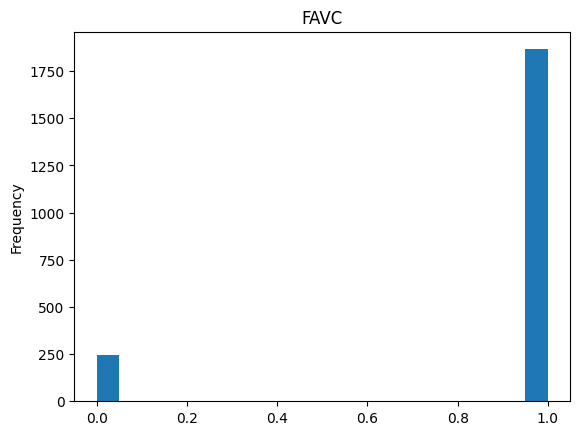

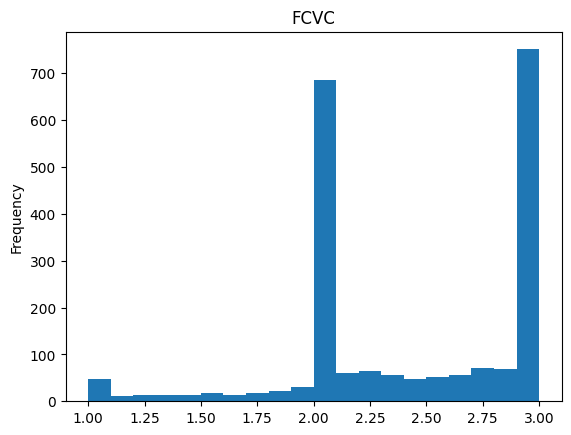

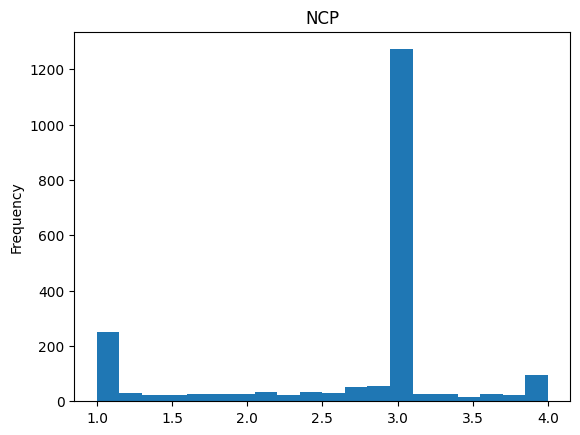

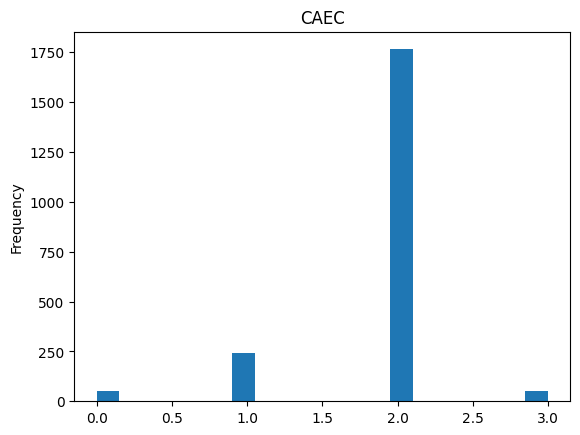

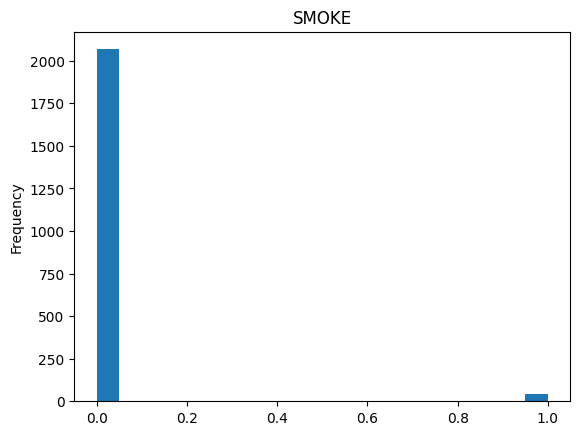

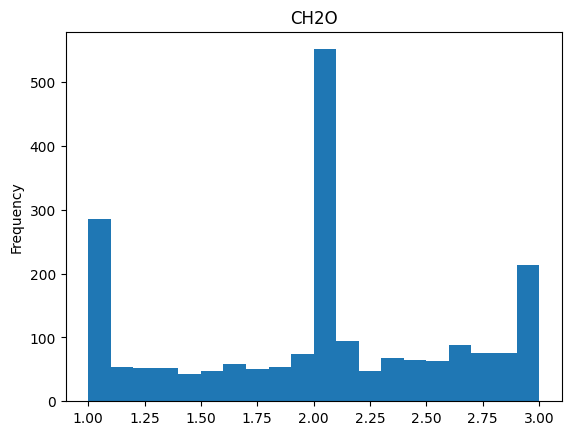

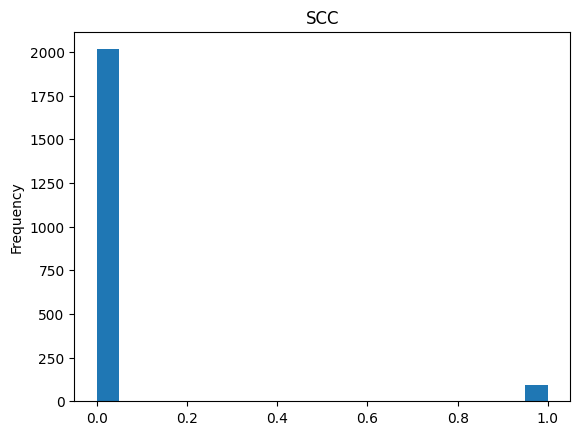

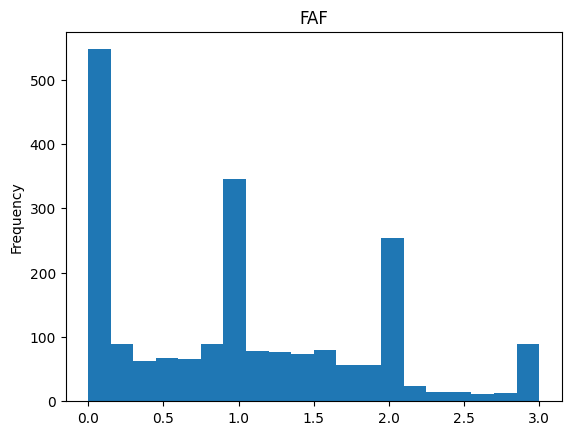

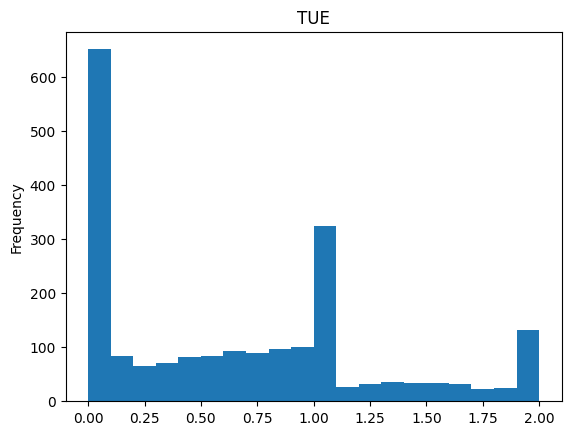

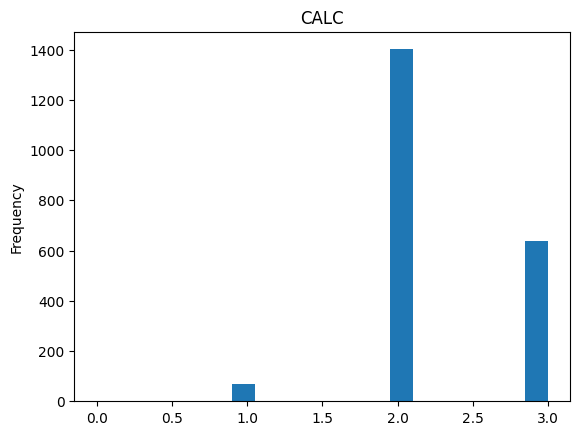

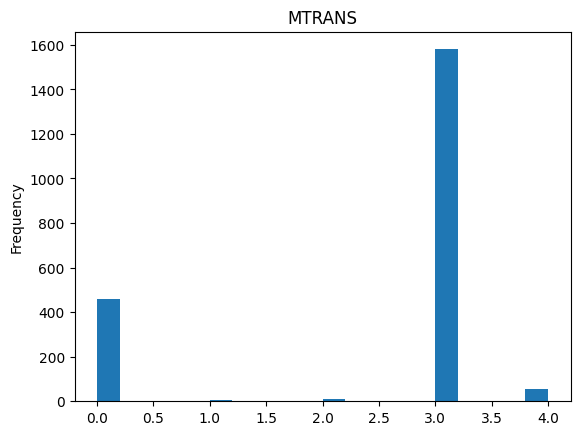

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   int64  
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   int64  
 5   FAVC                            2111 non-null   int64  
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   int64  
 9   SMOKE                           2111 non-null   int64  
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   int64  
 12  FAF                             21

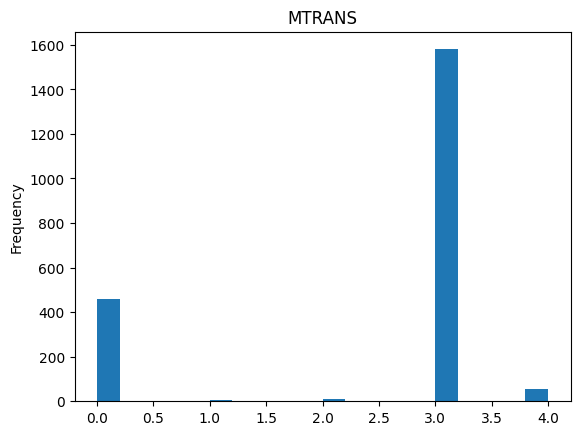

In [240]:
for column in project_dataframe.select_dtypes(include=['number']):
    plt.figure()
    project_dataframe[column].plot(kind='hist', bins=20, title=column)
    plt.show()

print(project_dataframe.info())
print('\n')
print(project_dataframe.describe())

plt.figure()
project_dataframe[column].plot(kind='hist', bins=20, title=column)
plt.show()


Quitar outliners. Al comprobar los outliners encontramos que no hay nada importante que objetar, por lo que lo dejamos tal cual.

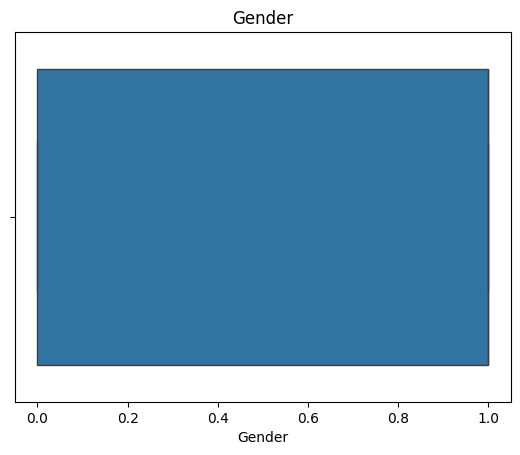

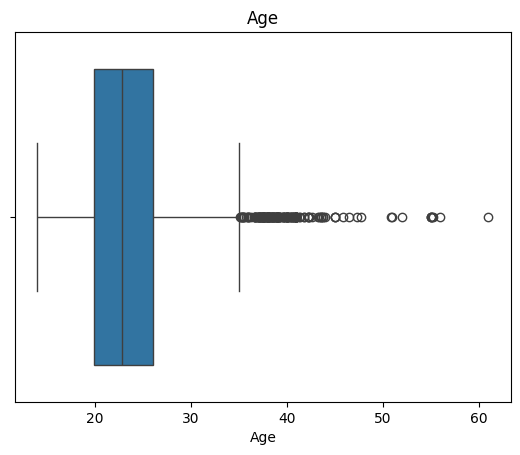

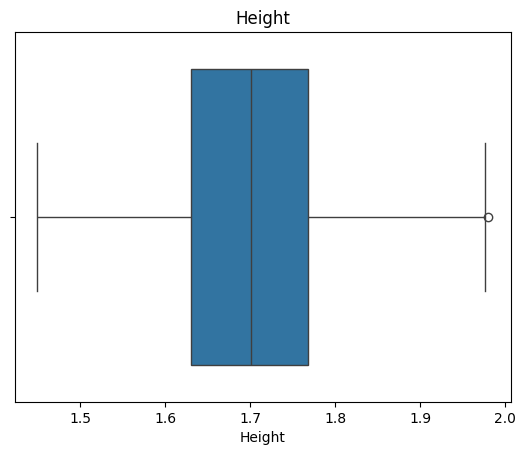

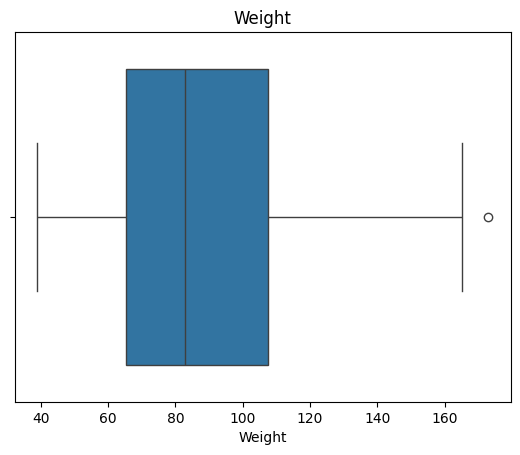

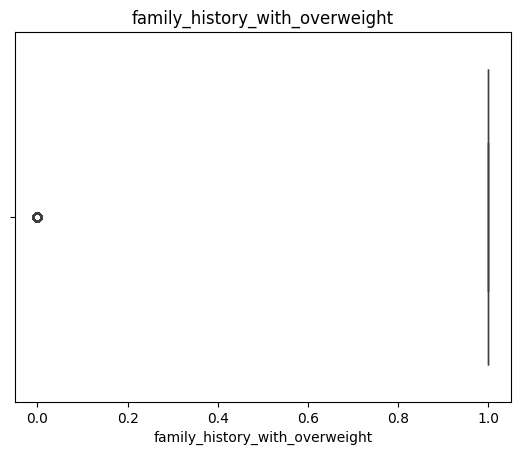

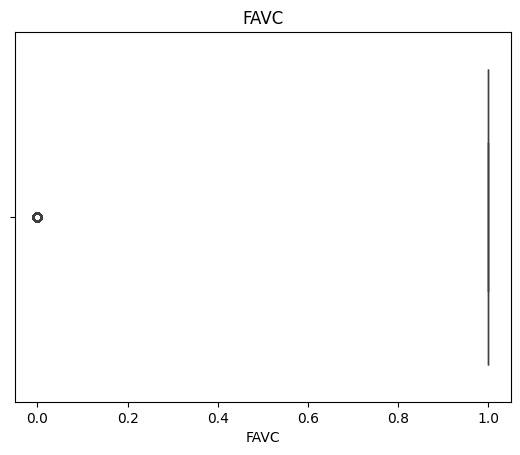

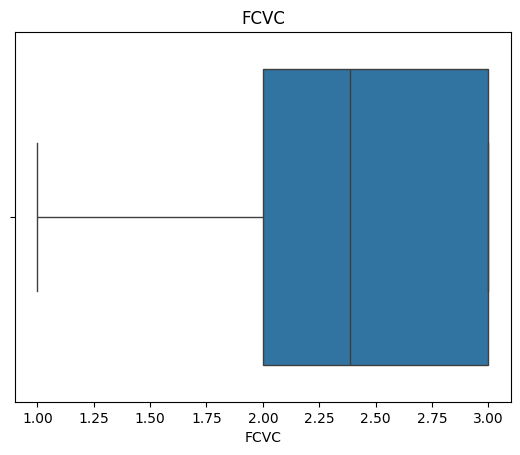

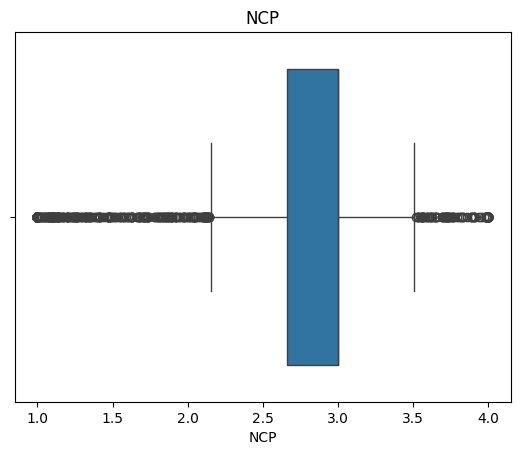

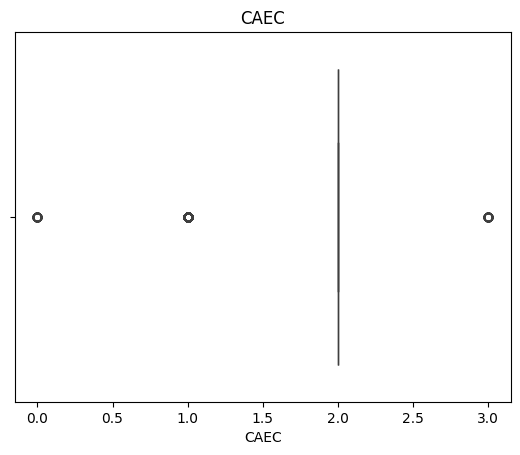

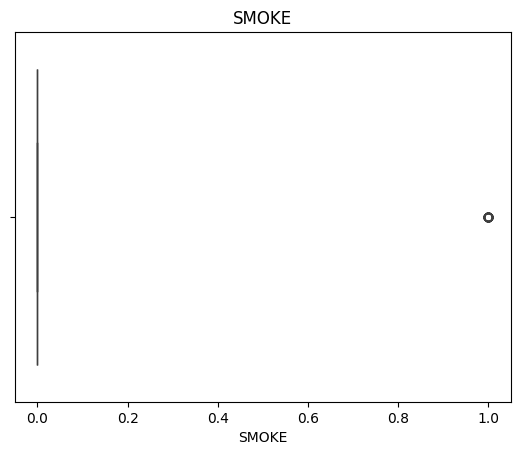

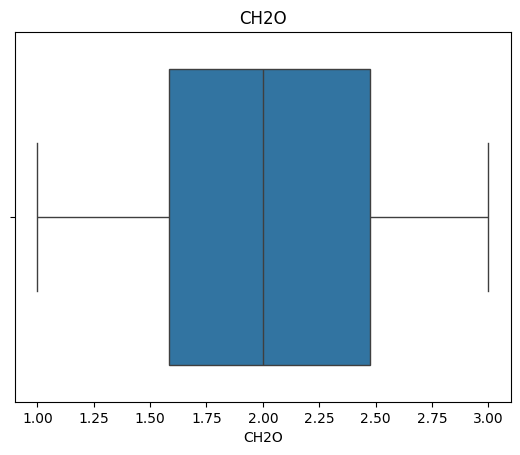

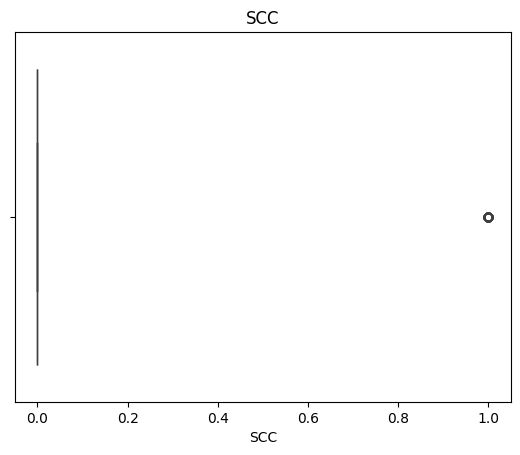

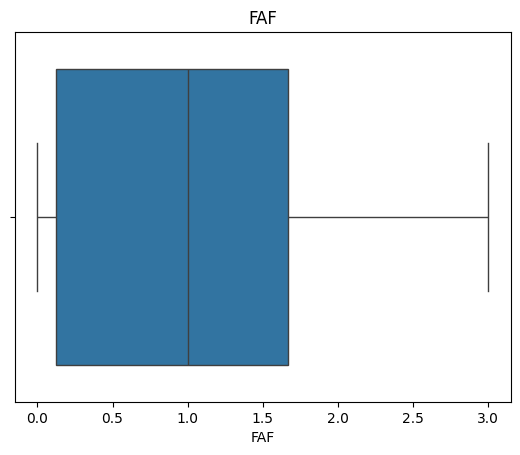

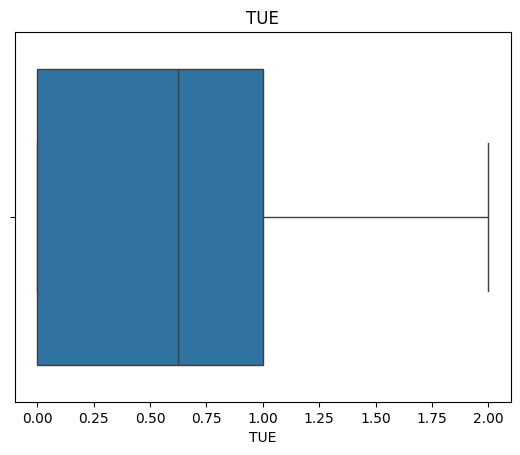

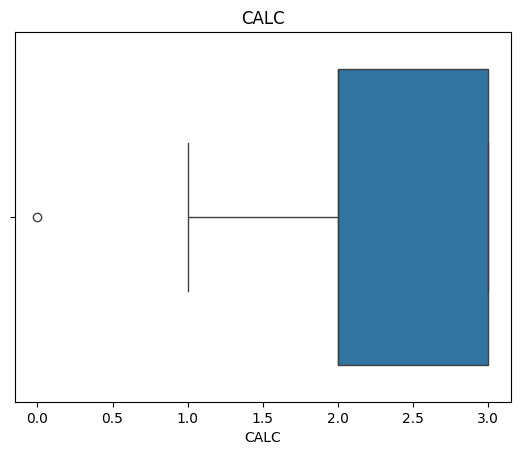

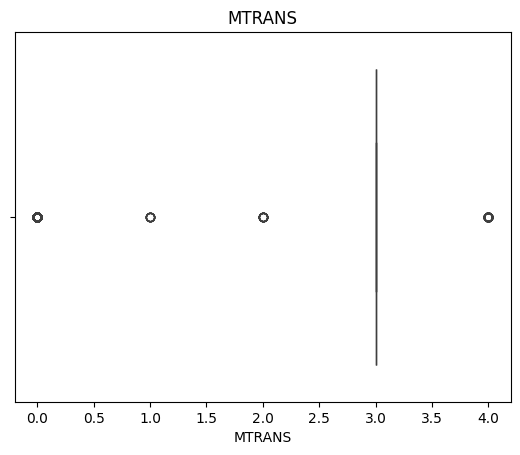

In [241]:
for column in project_dataframe.select_dtypes(include=[np.number]):
    plt.figure()
    sns.boxplot(x=project_dataframe[column])
    plt.title(column)
    plt.show()

## Gestion de los valores nulos

```markdown
Si tras el proceso de transformación de los datos, balanceo y tratamiento de outliers, se encuentra algún valor nulo, al ya ser todas las variables de tipo numérico, rellenamos los valores restantes según la mediana.
```

In [242]:
print(project_dataframe.isnull().sum())

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64


```markdown
Observamos que no existen valores nulos por lo que no es necesario el tratamiento de estos.
```

## Gestionamos la división de las clases en predictoras y objetivo

In [243]:
predict_variables = project_dataframe.drop('NObeyesdad', axis=1)
target_variable = project_dataframe['NObeyesdad']

# División en conjunto de entrenamiento(70%) y prueba(30%)
predict_variables_train, predict_variables_test, target_variable_train, target_variable_test = train_test_split(predict_variables, target_variable, test_size=0.3, random_state=42)

## Gestionamos el desbalanceo de las clases

In [244]:
# comprobar que tengan la misma cantidad de columnas
print("Distribución de clases antes de SMOTE:")
print(target_variable_train.value_counts())

smote = SMOTE()
predict_variables_train, target_variable_train = smote.fit_resample(predict_variables_train, target_variable_train)

# comprobar que tengan la misma cantidad de columnas
print("Distribución de clases después de SMOTE:")
print(target_variable_train.value_counts())

Distribución de clases antes de SMOTE:
NObeyesdad
Obesity_Type_I         249
Obesity_Type_III       226
Overweight_Level_II    211
Obesity_Type_II        209
Overweight_Level_I     202
Normal_Weight          194
Insufficient_Weight    186
Name: count, dtype: int64
Distribución de clases después de SMOTE:
NObeyesdad
Obesity_Type_III       249
Overweight_Level_II    249
Normal_Weight          249
Overweight_Level_I     249
Obesity_Type_II        249
Insufficient_Weight    249
Obesity_Type_I         249
Name: count, dtype: int64


In [245]:
models = {
  "KNN": KNeighborsClassifier(n_neighbors=20),
  "Árbol de Decisión": DecisionTreeClassifier(criterion='entropy', max_depth=12),
  "Naive Bayes": GaussianNB()
}


Modelo: KNN
[[79  7  0  0  0  0  0]
 [24 41  2  0  0 22  4]
 [ 0  0 69  8  5  9 11]
 [ 0  0  3 80  5  0  0]
 [ 0  0  0  3 95  0  0]
 [ 1 11  0  0  0 68  8]
 [ 0  3  9  2  0 18 47]]
                     precision    recall  f1-score   support

Insufficient_Weight       0.76      0.92      0.83        86
      Normal_Weight       0.66      0.44      0.53        93
     Obesity_Type_I       0.83      0.68      0.75       102
    Obesity_Type_II       0.86      0.91      0.88        88
   Obesity_Type_III       0.90      0.97      0.94        98
 Overweight_Level_I       0.58      0.77      0.66        88
Overweight_Level_II       0.67      0.59      0.63        79

           accuracy                           0.76       634
          macro avg       0.75      0.75      0.75       634
       weighted avg       0.76      0.76      0.75       634

Accuracy: 0.76


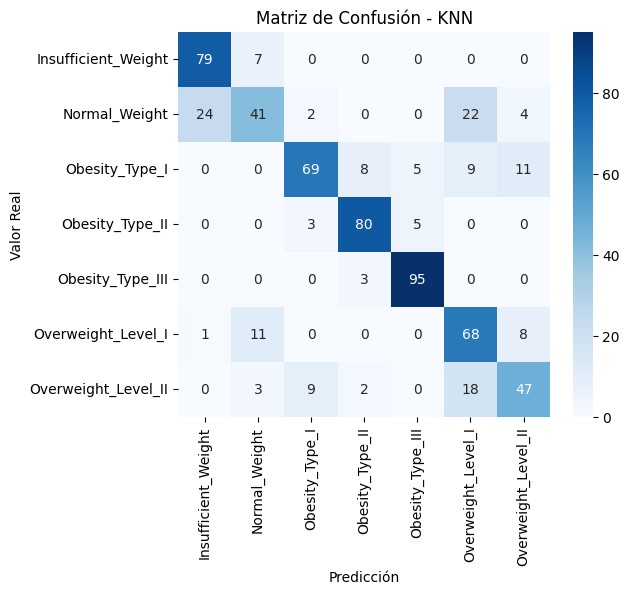


Modelo: Árbol de Decisión
[[80  6  0  0  0  0  0]
 [ 3 84  0  0  0  6  0]
 [ 0  1 91  5  0  0  5]
 [ 0  0  0 88  0  0  0]
 [ 0  0  0  1 97  0  0]
 [ 0  9  0  0  0 77  2]
 [ 0  0  1  0  0  2 76]]
                     precision    recall  f1-score   support

Insufficient_Weight       0.96      0.93      0.95        86
      Normal_Weight       0.84      0.90      0.87        93
     Obesity_Type_I       0.99      0.89      0.94       102
    Obesity_Type_II       0.94      1.00      0.97        88
   Obesity_Type_III       1.00      0.99      0.99        98
 Overweight_Level_I       0.91      0.88      0.89        88
Overweight_Level_II       0.92      0.96      0.94        79

           accuracy                           0.94       634
          macro avg       0.94      0.94      0.94       634
       weighted avg       0.94      0.94      0.94       634

Accuracy: 0.94


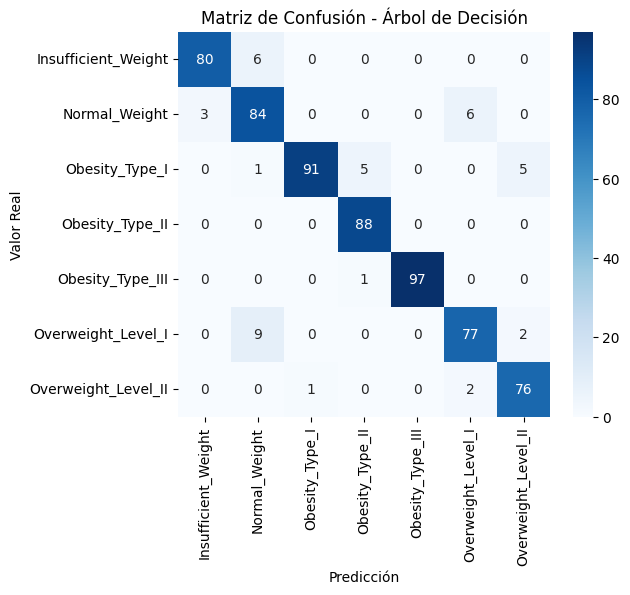

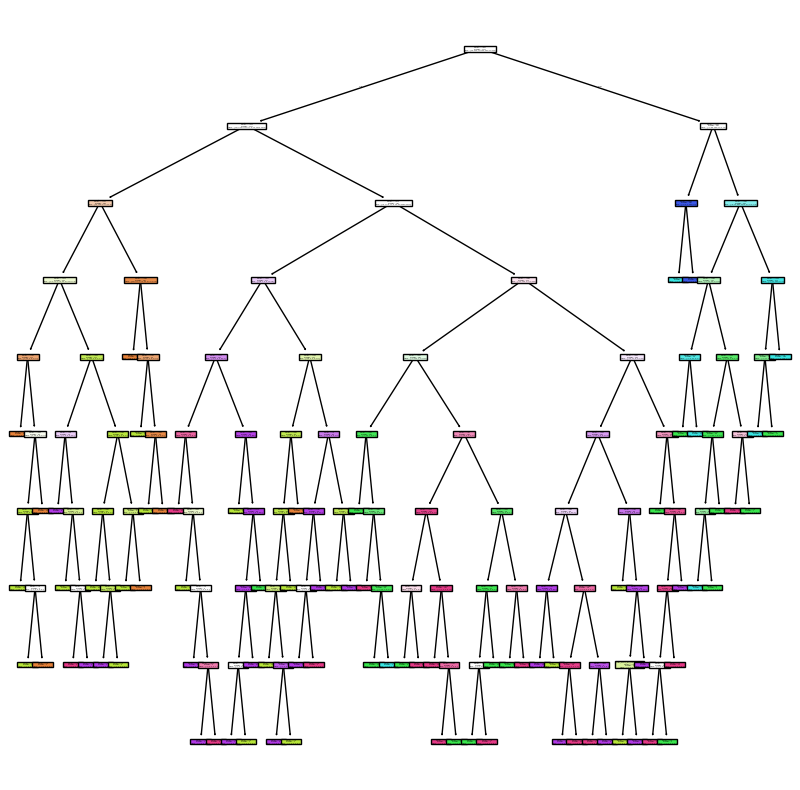


Modelo: Naive Bayes
[[67  7  8  0  0  4  0]
 [33 32  7  0  0 14  7]
 [ 0  2 64 27  0  5  4]
 [ 0  0  9 78  0  1  0]
 [ 0  0  1  0 97  0  0]
 [ 2 12 42  1  0 27  4]
 [ 0  8 42  7  0  5 17]]
                     precision    recall  f1-score   support

Insufficient_Weight       0.66      0.78      0.71        86
      Normal_Weight       0.52      0.34      0.42        93
     Obesity_Type_I       0.37      0.63      0.47       102
    Obesity_Type_II       0.69      0.89      0.78        88
   Obesity_Type_III       1.00      0.99      0.99        98
 Overweight_Level_I       0.48      0.31      0.38        88
Overweight_Level_II       0.53      0.22      0.31        79

           accuracy                           0.60       634
          macro avg       0.61      0.59      0.58       634
       weighted avg       0.61      0.60      0.58       634

Accuracy: 0.60


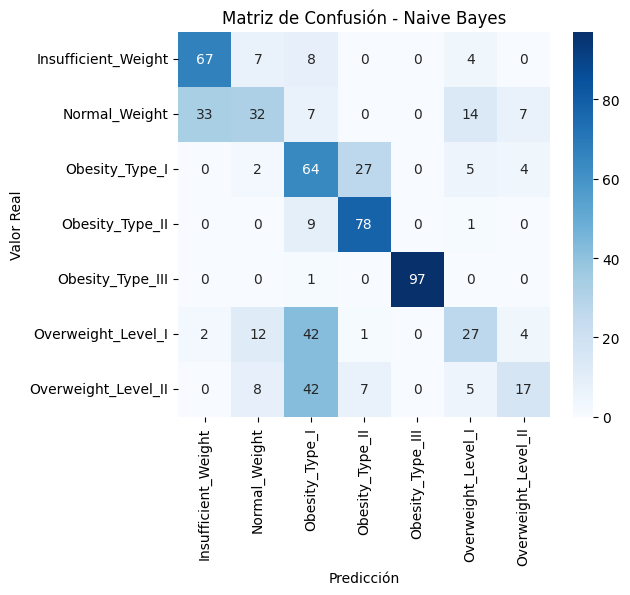

In [246]:
for name, model in models.items():
  model.fit(predict_variables_train, target_variable_train)  # Entrenar el modelo con el conjunto de entrenamiento
  target_variable_pred = model.predict(predict_variables_test)  # Hacer predicciones sobre el conjunto de prueba
  
  confusion_matrix_ = confusion_matrix(target_variable_test, target_variable_pred)
  
  print(f"\nModelo: {name}")
  print(confusion_matrix_)  # Matriz de confusión
  print(classification_report(target_variable_test, target_variable_pred))  # Reporte de clasificación
  print(f"Accuracy: {accuracy_score(target_variable_test, target_variable_pred):.2f}")  # Precisión
  
  # Graficar la matriz de confusión
  
  plt.figure(figsize=(6, 5))
  sns.heatmap(confusion_matrix_, annot=True, fmt="d", cmap="Blues", xticklabels=["Insufficient_Weight", "Normal_Weight", "Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III", "Overweight_Level_I", "Overweight_Level_II"], yticklabels=["Insufficient_Weight", "Normal_Weight", "Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III", "Overweight_Level_I", "Overweight_Level_II"])
  plt.title(f'Matriz de Confusión - {name}')
  plt.xlabel('Predicción')
  plt.ylabel('Valor Real')
  plt.show()

  if (name == "Árbol de Decisión"):
    plt.figure(figsize=(10, 10))
    tree.plot_tree(model, filled=True, feature_names=predict_variables.columns)
    plt.show()


Modelo: Naive Bayes
Mean Squared Error: 2.71
R^2 Score: 0.29


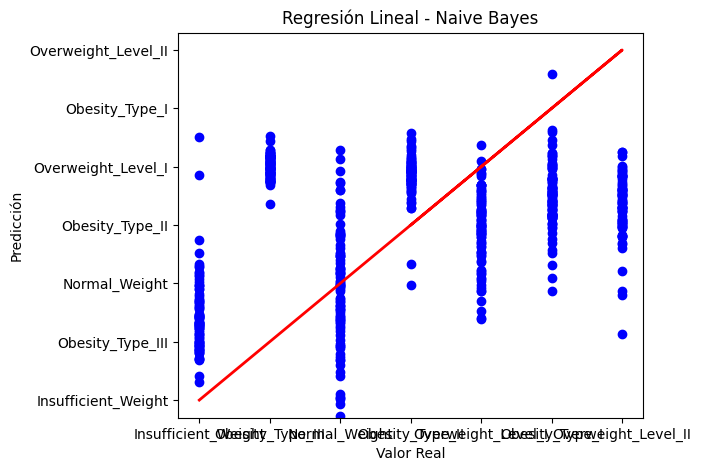

In [247]:
target_variable_test_numeric = target_variable_test
target_variable_train_numeric = target_variable_train

label_encoder = LabelEncoder()
target_variable_train_numeric = label_encoder.fit_transform(target_variable_train)
target_variable_test_numeric = label_encoder.transform(target_variable_test)

# Añadir el modelo de regresión lineal a tu diccionario de modelos
model = LinearRegression()
model.fit(predict_variables_train, target_variable_train_numeric)  # Entrenar el modelo con el conjunto de entrenamiento
target_variable_pred = model.predict(predict_variables_test)  # Hacer predicciones sobre el conjunto de prueba

mse = mean_squared_error(target_variable_test_numeric, target_variable_pred)
r2 = r2_score(target_variable_test_numeric, target_variable_pred)

print(f"\nModelo: {name}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

plt.figure(figsize=(6, 5))
plt.scatter(target_variable_test, target_variable_pred, color='blue')
plt.plot(target_variable_test, target_variable_test, color='red', linewidth=2)
plt.title(f'Regresión Lineal - {name}')
plt.xlabel('Valor Real')
plt.ylabel('Predicción')
plt.show()

In [ ]:
# En el modelo de regresion para nuestra base de datos no seria efectivo ya que el modelo de regresion unicamente funciona sobre datos numericos y no sirve pasarlo a numerico ya que si tenemos 0,1 y 2 como categorias que sustituyen a las cadenas, los resultados podrían dar
# resultados erroneos como 1,5 que no correspondería a ninguna categoria en nuestro modelo por eso no es efectivo.
# Para usar este modelo lo que podemos hacer es usar el modelo solo para predecir usando 2 variable numericas que contenga nuestra base d datos, por ejemplo, sabiendo la edad y el peso podemos predecir la altura?

# Transformar las características a un espacio polinómico
poly = PolynomialFeatures(degree=7)  # Puedes ajustar el grado del polinomio según sea necesario
predict_variables_train_poly = poly.fit_transform(predict_variables_train)
predict_variables_test_poly = poly.transform(predict_variables_test)

# Crear y entrenar el modelo de regresión polinómica
model = LinearRegression()
model.fit(predict_variables_train_poly, target_variable_train_numeric)  # Entrenar el modelo con el conjunto de entrenamiento
target_variable_pred = model.predict(predict_variables_test_poly)  # Hacer predicciones sobre el conjunto de prueba

# Calcular métricas de evaluación
mse = mean_squared_error(target_variable_test_numeric, target_variable_pred)
r2 = r2_score(target_variable_test_numeric, target_variable_pred)

# Imprimir métricas de evaluación
print(f"\nModelo: Regresión Polinómica")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

# Graficar las predicciones frente a los valores reales
plt.figure(figsize=(6, 5))
plt.scatter(target_variable_test_numeric, target_variable_pred, color='blue')
plt.plot(target_variable_test_numeric, target_variable_test_numeric, color='red', linewidth=2)
plt.title('Regresión Polinómica - Predicciones vs Valores Reales')
plt.xlabel('Valor Real')
plt.ylabel('Predicción')
plt.show()